In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("data/GroundTruth_Features.csv")
df

,Image_Metadata_Compound,id,batch,CYTOPLASM_ImageNumber,CYTOPLASM_AreaShape_BoundingBoxMinimum_X,CYTOPLASM_AreaShape_BoundingBoxMinimum_Y,CYTOPLASM_AreaShape_Compactness,CYTOPLASM_AreaShape_Eccentricity,CYTOPLASM_AreaShape_Extent,CYTOPLASM_AreaShape_FormFactor,...,CELLS_Texture_SumAverage_RescaleIntensityER_10_01_256,CELLS_Texture_SumAverage_RescaleIntensityRNA_10_01_256,CELLS_Texture_SumEntropy_RescaleIntensityDNA_5_03_256,CELLS_Texture_SumEntropy_RescaleIntensityER_2_02_256,CELLS_Texture_SumEntropy_RescaleIntensityMito_10_02_256,CELLS_Texture_SumEntropy_RescaleIntensityRNA_5_03_256,CELLS_Texture_SumVariance_RescaleIntensityAGP_10_02_256,CELLS_Texture_SumVariance_RescaleIntensityRNA_10_02_256,CELLS_Texture_Variance_RescaleIntensityER_2_01_256,CELLS_Texture_Variance_RescaleIntensityMito_2_03_256
0,0,1086307298_A01_3.npy,2,1,313.0,528.0,6.909380,0.872094,0.307925,0.144731,...,103.557960,135.901751,6.795078,6.956398,4.956184,6.959037,317.594288,1065.605963,485.605663,49.239103
1,1,1086307298_A02_4.npy,2,2,454.0,578.0,7.476000,0.832849,0.327847,0.133761,...,109.737482,143.925408,6.577293,6.973823,4.888605,7.037309,452.652919,1503.536648,406.639674,36.697475
2,0,1086307298_A13_3.npy,2,3,329.0,359.5,6.638243,0.861180,0.330785,0.150643,...,104.965577,133.826143,6.847392,7.044691,4.961381,6.959866,298.245053,1167.627014,595.434832,46.643096
3,2,1086307298_A17_4.npy,2,4,480.5,497.0,6.882299,0.866060,0.326752,0.145301,...,99.988145,129.262375,6.868767,6.909371,4.758921,6.852913,206.606850,961.547656,489.726299,33.136190
4,0,1086307298_A23_3.npy,2,5,469.5,459.5,7.138612,0.875652,0.308703,0.140084,...,99.026264,128.888100,6.991701,6.829503,4.870368,6.844311,279.501173,1007.326986,397.361055,47.189898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,2,1089426019_E19_2.npy,21,270,289.0,580.0,6.525308,0.828437,0.373119,0.153249,...,89.478386,115.139197,6.378367,6.736830,4.956172,6.851405,288.009943,1065.859485,314.530680,43.781887
269,1,1089426019_F06_3.npy,21,271,493.0,315.5,6.831895,0.808464,0.360016,0.146378,...,103.253451,123.728434,5.938767,7.070010,4.858601,7.057089,375.546659,1464.262762,405.695353,31.413260
270,1,1089426019_F20_3.npy,21,272,490.0,313.0,6.452973,0.843600,0.400952,0.154967,...,94.220942,115.771650,5.671784,6.961912,5.007903,6.868286,523.437455,1170.792847,399.299132,29.847646
271,2,1089426019_H17_1.npy,21,273,517.5,386.5,6.615739,0.823189,0.378942,0.151155,...,93.674142,117.733050,6.562473,6.829391,4.963979,6.848699,252.467731,1043.817384,394.950231,45.393048


In [4]:
df = df[["id", "CELLS_Neighbors_SecondClosestObjectNumber_5", "batch", "Image_Metadata_Compound"]]
df

,id,CELLS_Neighbors_SecondClosestObjectNumber_5,batch,Image_Metadata_Compound
0,1086307298_A01_3.npy,76.0,2,0
1,1086307298_A02_4.npy,35.0,2,1
2,1086307298_A13_3.npy,97.0,2,0
3,1086307298_A17_4.npy,104.0,2,2
4,1086307298_A23_3.npy,102.5,2,0
...,...,...,...,...
268,1089426019_E19_2.npy,68.0,21,2
269,1089426019_F06_3.npy,23.0,21,1
270,1089426019_F20_3.npy,22.0,21,1
271,1089426019_H17_1.npy,92.5,21,2


In [5]:
df.Image_Metadata_Compound.value_counts()

2    170
0     77
1     26
Name: Image_Metadata_Compound, dtype: int64

26 positive controls; 77 negative controls; 170 treatments

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns

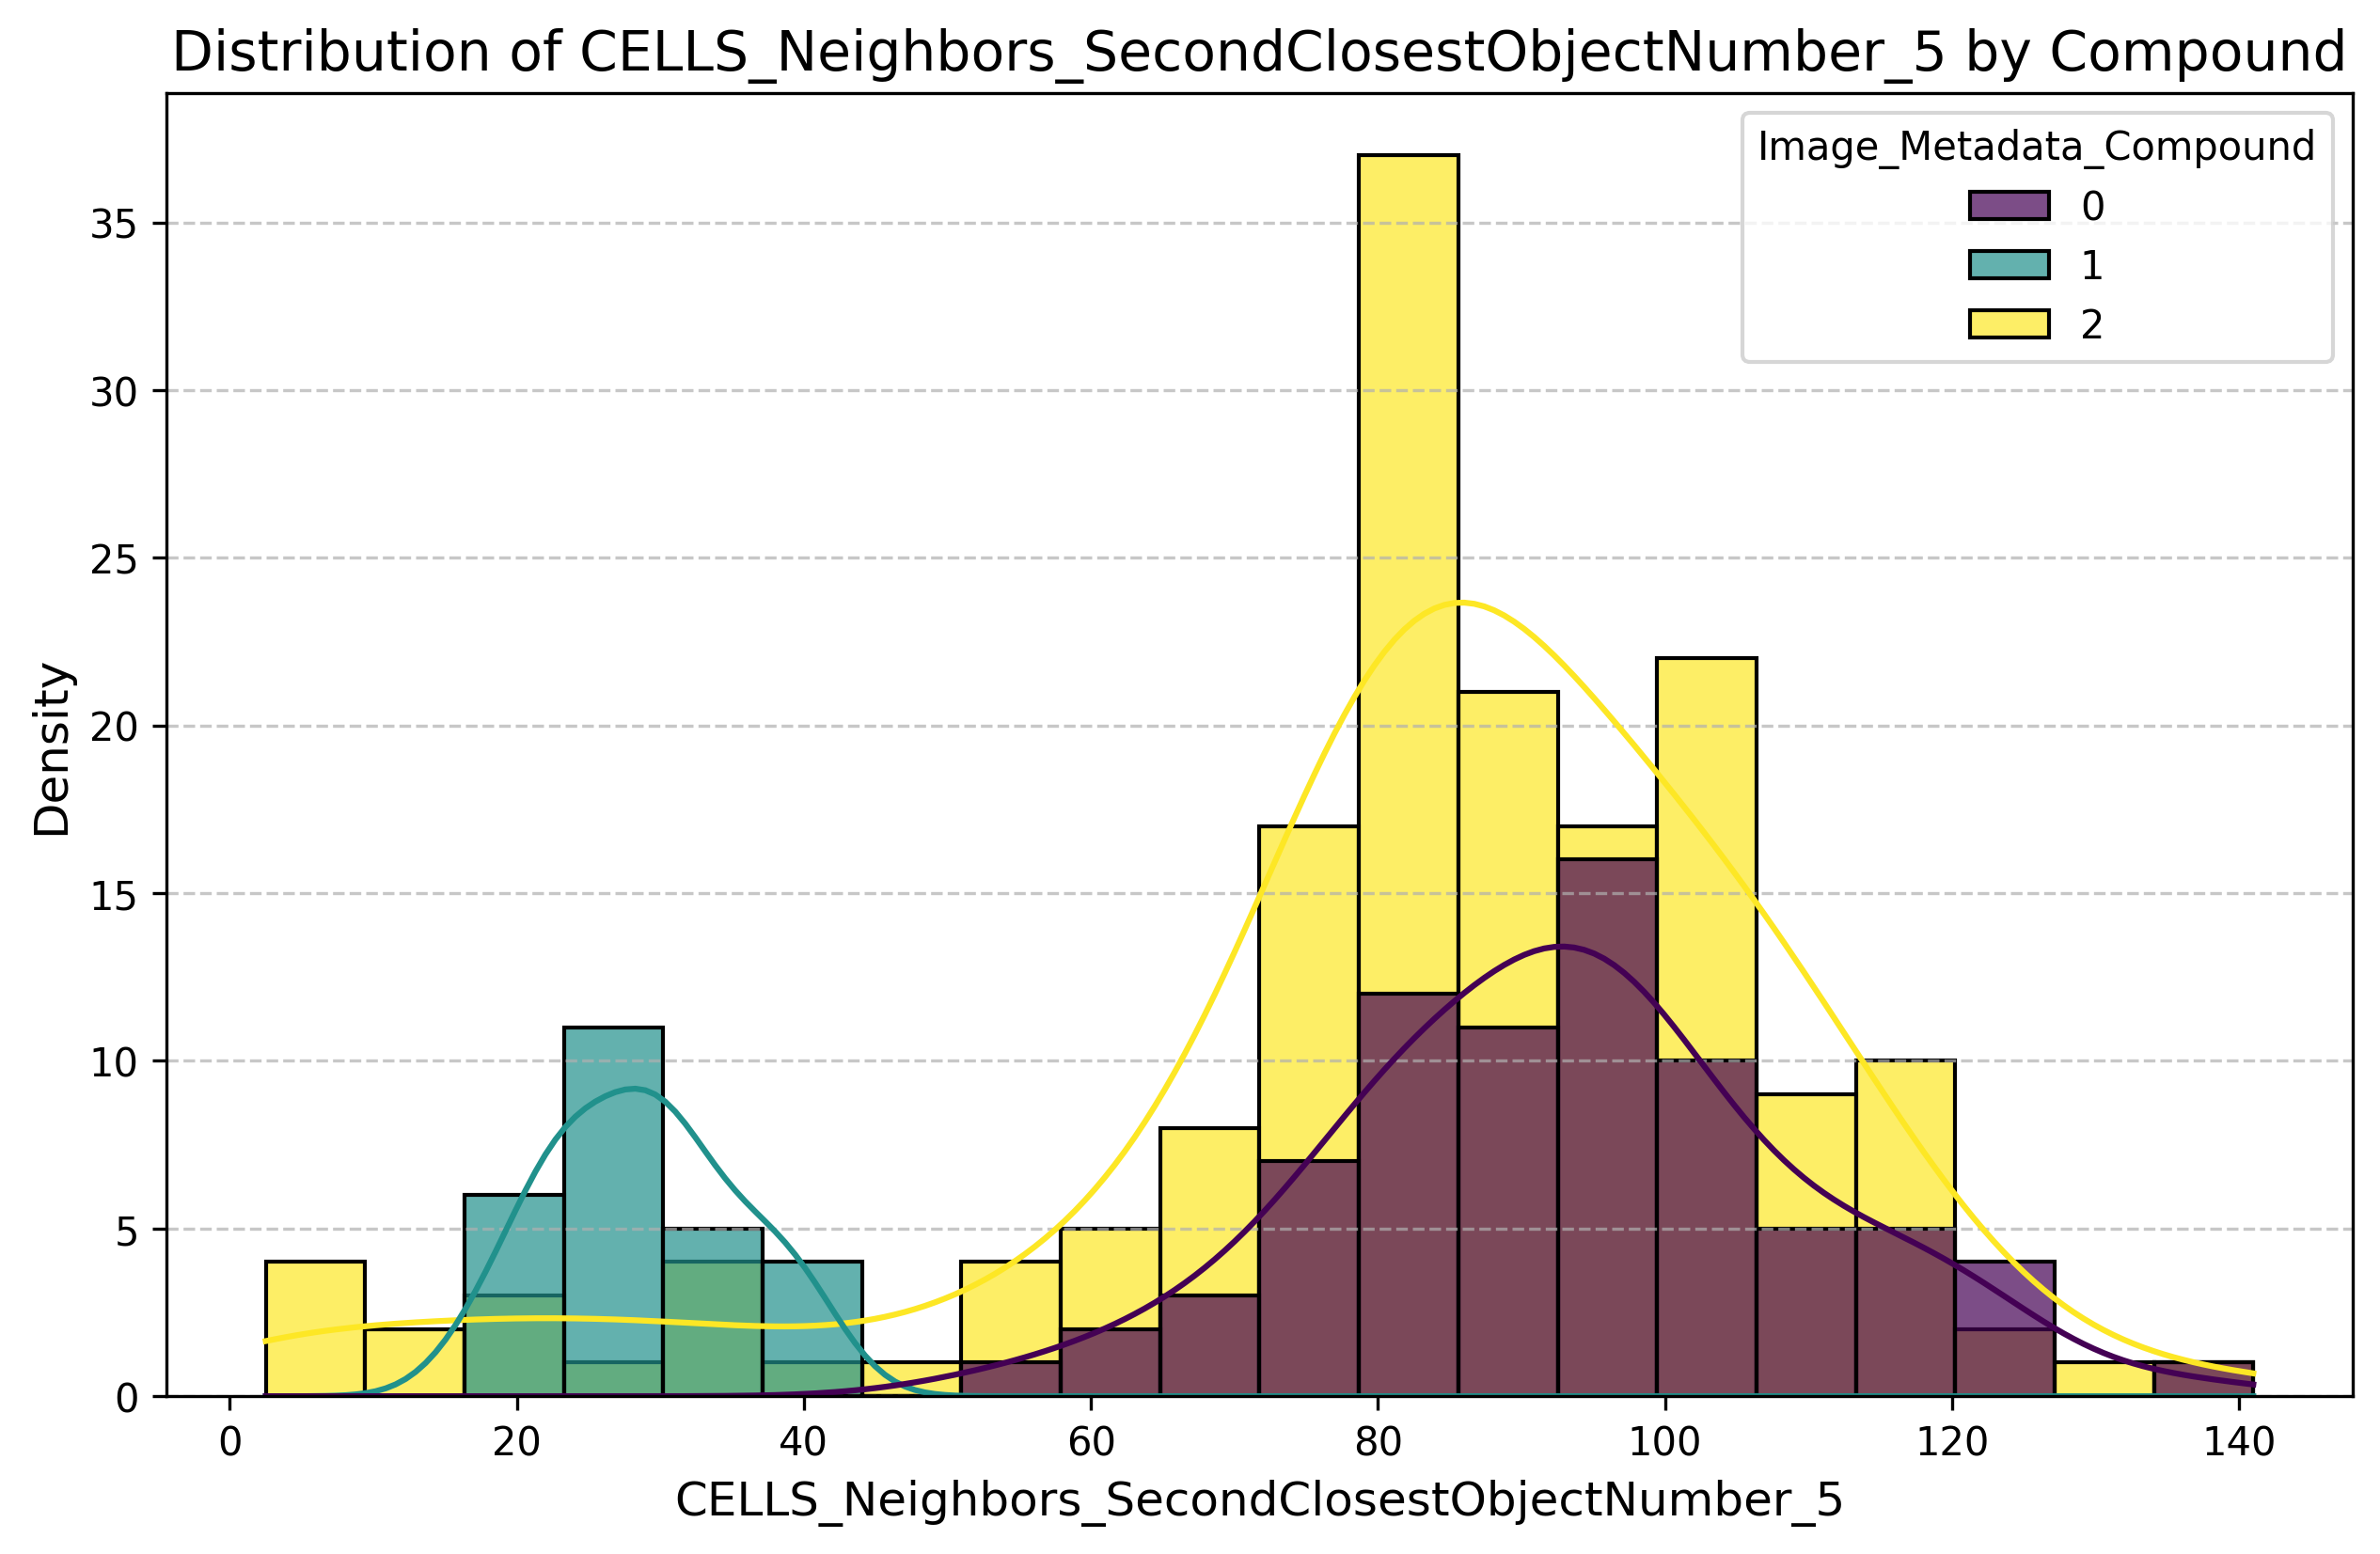

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distributions grouped by 'Image_Metadata_Compound'
plt.figure(figsize=(10, 6), dpi=300)
plot = sns.histplot(
    data=df,
    x='CELLS_Neighbors_SecondClosestObjectNumber_5',
    hue='Image_Metadata_Compound',
    kde=True,
    palette='viridis',
    alpha=0.7,
    bins=20,
    legend=True  # Explicitly request the legend
)


# Add titles and labels
plt.title("Distribution of CELLS_Neighbors_SecondClosestObjectNumber_5 by Compound", fontsize=14)
plt.xlabel("CELLS_Neighbors_SecondClosestObjectNumber_5", fontsize=12)
plt.ylabel("Density", fontsize=12)

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [19]:
handles

[]

In [ ]:
df.groupby("Image_Metadata_Compound").mean()

,CELLS_Neighbors_SecondClosestObjectNumber_5,batch
Image_Metadata_Compound,,
0,93.175325,8.168831
1,28.788462,9.307692
2,83.452941,8.817647


In [ ]:
df.groupby("Image_Metadata_Compound").std()

,CELLS_Neighbors_SecondClosestObjectNumber_5,batch
Image_Metadata_Compound,,
0,15.914816,8.955155
1,6.560752,9.426640
2,25.436384,9.140374


In [ ]:
df_2 = df[df["CELLS_Neighbors_SecondClosestObjectNumber_5"]>(28.788462-1*6.560752)]
df_2 = df_2[df_2["CELLS_Neighbors_SecondClosestObjectNumber_5"]<(28.788462+1*6.560752)]
df_2 = df_2[df_2["Image_Metadata_Compound"]==2]
df_2

,id,CELLS_Neighbors_SecondClosestObjectNumber_5,batch,Image_Metadata_Compound
86,1086307335_C01_1.npy,24.0,2,2
163,1086307366_N11_4.npy,33.0,2,2
264,1089426002_O01_3.npy,32.0,21,2
272,1089426019_P03_3.npy,33.0,21,2


In [ ]:
for id in df_2.id.to_list():
    print(id)

1086307335_C01_1.npy
1086307366_N11_4.npy
1089426002_O01_3.npy
1089426019_P03_3.npy


In [ ]:
df_2 = df[df["CELLS_Neighbors_SecondClosestObjectNumber_5"]>(28.788462-1.5*6.560752)]
df_2 = df_2[df_2["CELLS_Neighbors_SecondClosestObjectNumber_5"]<(28.788462+1.5*6.560752)]
df_2 = df_2[df_2["Image_Metadata_Compound"]==2]
df_2

,id,CELLS_Neighbors_SecondClosestObjectNumber_5,batch,Image_Metadata_Compound
51,1086307298_N22_4.npy,20.0,2,2
86,1086307335_C01_1.npy,24.0,2,2
155,1086307366_K05_3.npy,20.5,2,2
162,1086307366_N07_3.npy,36.5,2,2
163,1086307366_N11_4.npy,33.0,2,2
172,1086307366_P11_3.npy,21.0,2,2
264,1089426002_O01_3.npy,32.0,21,2
272,1089426019_P03_3.npy,33.0,21,2


In [ ]:
for id in df_2.id.to_list():
    print(id)

1086307298_N22_4.npy
1086307335_C01_1.npy
1086307366_K05_3.npy
1086307366_N07_3.npy
1086307366_N11_4.npy
1086307366_P11_3.npy
1089426002_O01_3.npy
1089426019_P03_3.npy
